<a href="https://colab.research.google.com/github/BI-DS/EBA-3530/blob/main/Lecture_8/neuralnets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Neural Networks

Let's use `tensorflow` and `keras` to build a feed-forward neural network 🔥

## 1) Specify layer by layer and add them to a `Sequential` model

In [2]:
# specify number of neurons in the first hidden layer
no_neurons   = 5
# and the shape of the input data. Note that
# you not need to specify the number of rows
# only the number of features
input_shape  = (2,)
# activation function in the hidden layer
activation   = 'tanh'

The `Dense` layer is such a layer where all features in vector $\mathbf{x}$ are connected to all neurons specified by the parameter `no_neurons`

In [3]:
hidden_layer1 = layers.Dense(no_neurons,
          input_shape=input_shape,
          activation=activation,
          name = 'hidden_layer1'
          )

Now you add your hidden layer to a `Sequential` model, which automatically sends the output to the next type of layer specified in the model

In [46]:
neuralnet = Sequential([
                        hidden_layer1
                        ])

# you can call the method summary to see your model
print(neuralnet.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 5)                 15        
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


`Param` shows the number of weights in your model. Why does the model have 15 weights?

Now you can specify the output layer and add it to your model `neuralnet`

In [4]:
no_neurons   = 1
activation   = 'sigmoid'
output_layer = layers.Dense(no_neurons,
            activation=activation,
            name = 'output_layer'
            )

In [ ]:
neuralnet.add(output_layer)
print(neuralnet.summary())

## 2) Specify all layers at once

of course, you can pass all layers at once to your `Sequential` model

In [5]:
neuralnet = Sequential([
                        hidden_layer1,
                        output_layer
                        ])
print(neuralnet.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 5)                 15        
                                                                 
 output_layer (Dense)        (None, 1)                 6         
                                                                 
Total params: 21 (84.00 Byte)
Trainable params: 21 (84.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


## 3) Compile the model
Once all layers are specified, you need to comiple the model specifying the loss function, optimizer, and metric

In [6]:
neuralnet.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                )

Simulate some data for classification ....

In [7]:
def make_data(n_samples, n_features, cov_class_1, cov_class_2, seed=0, diff=0):
     rng = np.random.RandomState(seed)
     X = np.concatenate(
         [
        np.matmul(rng.randn(n_samples-diff, n_features),cov_class_1),
        np.matmul(rng.randn(n_samples, n_features),cov_class_2)+np.array([1, 1])
         ]
     )
     y = np.concatenate([np.zeros(n_samples-diff), np.ones(n_samples)])
     return X, y

# We simulate 1000 obs and will use 15% for validation
covariance = np.array([[0.0, -0.23], [0.83, 0.23]])
X, y = make_data(
     n_samples=1000,
     n_features=2,
     cov_class_1=covariance,
     cov_class_2=covariance,
     seed=0,
)

## 4) Train your model

Simply call the `fit` method and pass the data and number of epochs 😃. Let's start by training the neural network for 10 epochs.

In [8]:
history = neuralnet.fit(X,y,
                        validation_split=0.15,
                        epochs=10)

Epoch 1/10
54/54 [==============================] - 3s 7ms/step - loss: 0.6709 - accuracy: 0.6235 - val_loss: 0.6439 - val_accuracy: 0.7567
Epoch 2/10
54/54 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.7165 - val_loss: 0.5992 - val_accuracy: 0.7967
Epoch 3/10
54/54 [==============================] - 0s 4ms/step - loss: 0.5735 - accuracy: 0.7488 - val_loss: 0.5667 - val_accuracy: 0.8200
Epoch 4/10
54/54 [==============================] - 0s 4ms/step - loss: 0.5340 - accuracy: 0.7812 - val_loss: 0.5349 - val_accuracy: 0.8233
Epoch 5/10
54/54 [==============================] - 0s 3ms/step - loss: 0.4990 - accuracy: 0.7947 - val_loss: 0.5042 - val_accuracy: 0.8367
Epoch 6/10
54/54 [==============================] - 0s 4ms/step - loss: 0.4670 - accuracy: 0.8088 - val_loss: 0.4809 - val_accuracy: 0.8400
Epoch 7/10
54/54 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.8229 - val_loss: 0.4620 - val_accuracy: 0.8333
Epoch 8/10
54/54 [==

## 5) Decision surface

Let's plot the decision surface of the neural network using the grid approach

In [9]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
Z = neuralnet.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

137/137 [==============================] - 0s 1ms/step


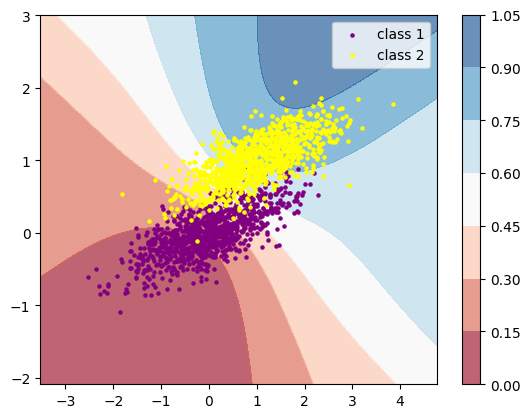

In [10]:
C = plt.contourf(xx,yy,Z,cmap='RdBu',alpha=0.65)
plt.colorbar(C)
plt.scatter(X[y==0,0], X[y==0,1], c='purple', s=5, label='class 1')
plt.scatter(X[y==1,0], X[y==1,1], c='yellow', s=5, label='class 2')
plt.legend()
plt.show()

## 6) Track loss and accuracy
Plot the loss and accuracy along training

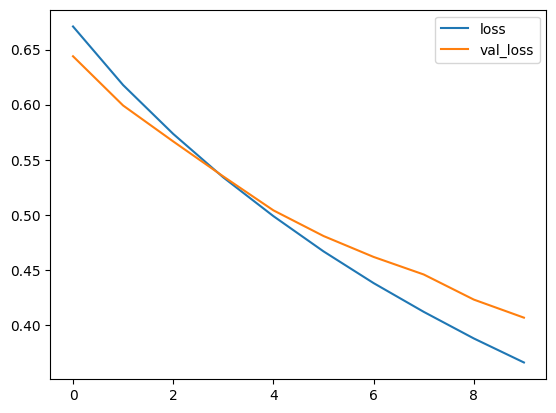

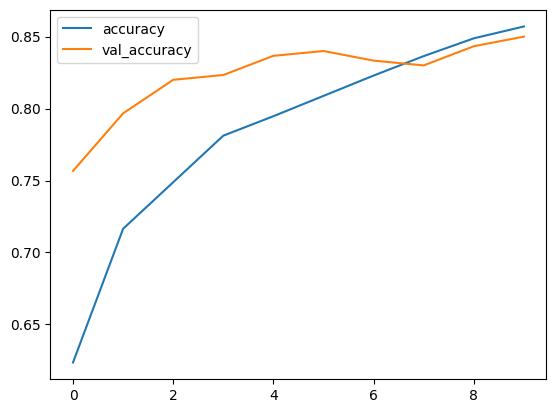

In [11]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot()
history_df.loc[:, ['accuracy','val_accuracy']].plot()
plt.show()

You can see that the loss function hasn't flatten out. So let's define a new neural network and train it for 60 epochs.

In [12]:
# defining
neuralnet2 = Sequential([
                        hidden_layer1,
                        output_layer
                        ])
# compiling
neuralnet2.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy']
                )
# fitting
history = neuralnet2.fit(X,y,
                        validation_split=0.15,
                        verbose=False,
                        epochs=60)

Now we can visualize the decision surface, loss, and accuracy

137/137 [==============================] - 0s 1ms/step


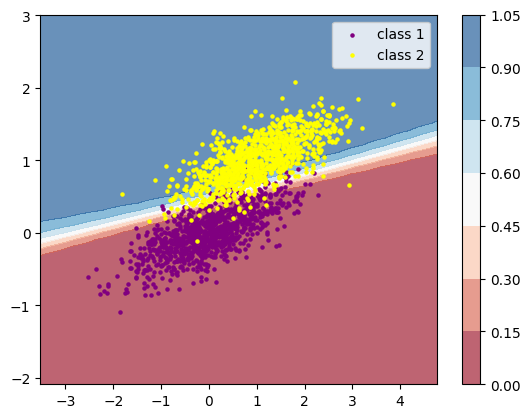

In [13]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))
Z = neuralnet.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
C = plt.contourf(xx,yy,Z,cmap='RdBu',alpha=0.65)
plt.colorbar(C)
plt.scatter(X[y==0,0], X[y==0,1], c='purple', s=5, label='class 1')
plt.scatter(X[y==1,0], X[y==1,1], c='yellow', s=5, label='class 2')
plt.legend()
plt.show()

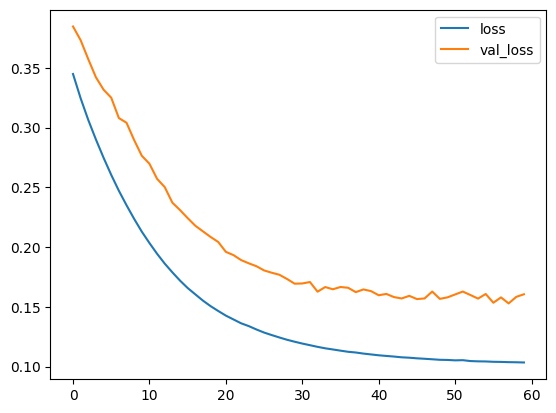

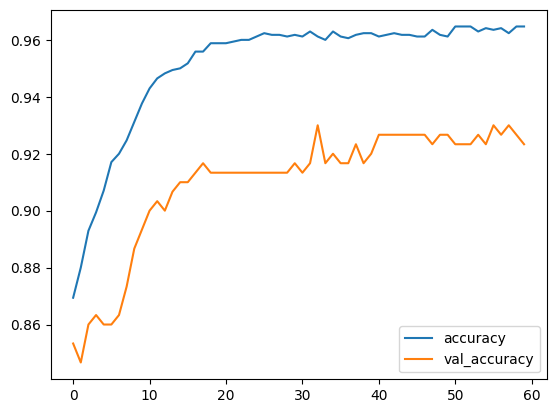

In [14]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss','val_loss']].plot()
history_df.loc[:, ['accuracy','val_accuracy']].plot()
plt.show()